<small>

#### Bibliothèques Essentielles

Pour mener l’analyse, il est nécessaire d’importer les bibliothèques essentielles.  
Elles fournissent les outils nécessaires pour manipuler les données, les visualiser et les analyser efficacement.  
Les principales bibliothèques utilisées sont **pandas** et **numpy** pour le traitement des données, **matplotlib** et **seaborn** pour la visualisation, **scikit-learn** pour le prétraitement et la modélisation, **xgboost** pour les modèles avancés, ainsi qu’**imbalanced-learn** pour gérer le déséquilibre des classes.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import itertools
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [45]:
file_path = os.path.join("..", "data", "raw", "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [49]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.00,NaN,NaN,NaN,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.00,NaN,NaN,NaN,32.37,24.56,0.00,9.00,29.00,55.00,72.00
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<small>

L'ensemble de données présente de nombreuses caractéristiques textuelles, représentant probablement des caractéristiques catégorielles. Notamment, la caractéristique « Charges totales » contient des valeurs numériques, mais est actuellement stockée sous forme de chaîne. Dans un premier temps, nous allons convertir les entrées de cette colonne en nombres à virgule flottante pour une analyse plus approfondie.

In [51]:
#Converting DataFrame column elements from string to float using the following code line :
non_convertible_values = df[df['TotalCharges'] == ' ']['TotalCharges']

# Print unique non-convertible values
print("Non-convertible values:", non_convertible_values.unique())

# Remplace les valeurs vides par NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Drop rows with ' ' in 'TotalCharges'
df = df[df['TotalCharges'] != ' ']

# Convert the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.drop(columns = ['customerID'], inplace = True)

Non-convertible values: [' ']


In [52]:
print(df.shape)
print(df['TotalCharges'].isna().sum())
print(df.dtypes)

(7043, 20)
11
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


<small>

Lors de la conversion de la colonne **`TotalCharges`** en type *float*, une erreur est apparue à cause de la présence de chaînes vides (`' '`).  
Ces valeurs, bien que stockées sous forme de chaînes de caractères, ne sont pas considérées comme des valeurs nulles et n’apparaissent donc pas dans la détection classique des valeurs manquantes.  
Un exemple typique est une variable chaîne définie comme `a = ' '`.

Pour résoudre ce problème, nous avons remplacé les chaînes vides par des valeurs manquantes (`NaN`) puis converti la colonne en **float**.  
Les lignes contenant des valeurs non convertibles ont ensuite été supprimées.

De plus :  
- La colonne **`customerID`** a été supprimée car elle n’apporte aucune information utile à la modélisation.  
- Les variables ont été catégorisées en **numériques** et **catégorielles**.  
- Les variables catégorielles ont été transformées grâce à un **Label Encoding** afin de permettre leur utilisation dans les modèles de Machine Learning.


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [41]:

# Copie du DataFrame
df_encoded = df.copy()

# Colonnes binaires (Yes/No ou Male/Female)
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

# Colonnes multi-catégorielles
multi_cat_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                  "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                  "Contract", "PaymentMethod"]

# OneHotEncoding
df_encoded = pd.get_dummies(df_encoded, columns=multi_cat_cols, drop_first=True)

# Vérification
print(df_encoded.head())
print("Shape final:", df_encoded.shape)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                    

<small>

Afin de préserver l’intégrité du **jeu de données brut**, nous avons généré une **copie profonde** (*deep copy*).  
Toutes les transformations appliquées — notamment l’**encodage des variables catégorielles** — ont été réalisées sur cette copie, de manière à convertir l’ensemble des attributs en valeurs **numériques exploitables**.  

Les variables binaires (`Yes/No`, `Male/Female`) ont été transformées en indicateurs **0/1**, tandis que les variables multi-catégorielles (`Contract`, `PaymentMethod`, `InternetService`, etc.) ont été traitées par **One-Hot Encoding**, garantissant l’absence d’ordre artificiel entre les modalités.  

Cette version transformée du dataset constitue une base fiable pour les étapes suivantes :  
- **visualisation** (corrélations, distributions, analyses de churn),  
- **modélisation prédictive** (régression logistique, forêts aléatoires, gradient boosting).  

Enfin, nous avons recalculé les **statistiques descriptives** afin d’obtenir une vue d’ensemble cohérente sur le jeu de données désormais numérisé.  

In [42]:
df_encoded.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.59,64.76,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.49,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,35.50,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,1.00,89.85,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,1.00,118.75,8684.80,1.00


<small>

Le dataset encodé est désormais **entièrement numérique** et exploitable pour l’apprentissage automatique.  

- Les **variables binaires** (par ex. `Partner`, `PhoneService`, `PaperlessBilling`) ont été converties en indicateurs **0/1**.  
- Les **variables multi-catégorielles** (`Contract`, `InternetService`, `PaymentMethod`, etc.) ont été transformées en colonnes indicatrices via **One-Hot Encoding**, supprimant tout ordre artificiel entre les modalités.  
- Les variables **numériques continues** (`tenure`, `MonthlyCharges`, `TotalCharges`) ont conservé leurs valeurs d’origine.  
- La variable cible `Churn` est encodée en **0 = Non** et **1 = Oui**, avec un taux de churn d’environ **27%**, traduisant un **déséquilibre de classes** à prendre en compte lors de la modélisation.  

Nous disposons ainsi d’un jeu de données **propre, encodé et prêt** pour la prochaine étape : la **séparation en ensembles d’entraînement et de test**, puis la construction des premiers modèles de prédiction.  

</small>


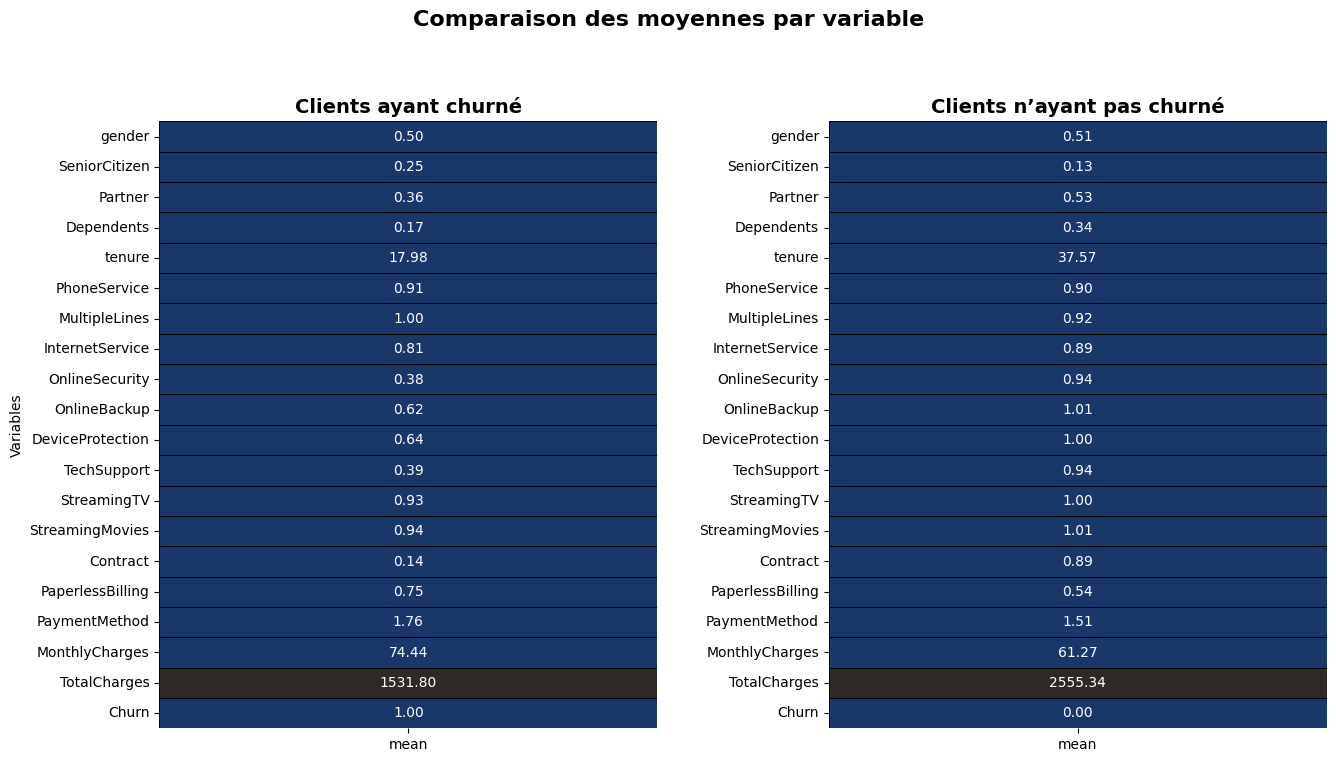

In [54]:

# Palette
colors = ["#1A376A", "#2D2926"]

# Statistiques descriptives
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

# Création des heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.heatmap(
    churn[['mean']], annot=True, cmap=colors,
    linewidths=0.5, linecolor='black',
    cbar=False, fmt='.2f', ax=axes[0]
)
axes[0].set_title("Clients ayant churné", fontsize=14, weight='bold')
axes[0].set_ylabel("Variables")

sns.heatmap(
    not_churn[['mean']], annot=True, cmap=colors,
    linewidths=0.5, linecolor='black',
    cbar=False, fmt='.2f', ax=axes[1]
)
axes[1].set_title("Clients n’ayant pas churné", fontsize=14, weight='bold')
axes[1].set_ylabel("")

plt.suptitle("Comparaison des moyennes par variable", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()


<small>

- **Ancienneté (Tenure)** : Les clients qui ont churné présentent une ancienneté moyenne plus faible (**17,98 mois**) que ceux qui sont restés (**37,57 mois**).  
- **Services en ligne** : Les fonctionnalités comme **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** et **TechSupport** affichent des valeurs moyennes plus élevées chez les clients non churnés, ce qui souligne leur rôle potentiel dans la **fidélisation**.  
- **Durée du contrat** : Les clients ayant résilié disposent de contrats sensiblement plus courts que ceux qui sont restés.  
- **Frais mensuels (MonthlyCharges)** : Les clients churnés paient en moyenne **74,44**, contre **61,27** pour les clients non churnés.  
- **Frais totaux (TotalCharges)** : Les clients fidèles présentent des frais totaux plus élevés (**2555,34**) que ceux ayant résilié (**1531,80**).  
- **Variables catégorielles** : En raison du grand nombre de variables catégorielles, leurs moyennes sont concentrées autour de 0, ce qui limite leur interprétation directe sous cette forme.  

En effet, ces observations mettent en évidence des zones d’intérêt pour améliorer la **rétention des clients** et soulignent l’importance de certaines caractéristiques dans la probabilité de churn.  
Une exploration plus approfondie dans la section **EDA** permettra d’analyser ces tendances en détail.


In [31]:
# Sauvegarde dans le bon dossier
df_encoded.to_csv("../data/processed/telco_churn_clean.csv", index=False)

print("Dataset encodé sauvegardé dans data/processed/telco_churn_clean.csv")

Dataset encodé sauvegardé dans data/processed/telco_churn_clean.csv


In [56]:
# Sauvegarde dans le bon dossier
df1.to_csv("../data/processed/df1.csv", index=False)

print("Dataset traité et sauvegardé dans data/processed/df1.csv")

Dataset traité et sauvegardé dans data/processed/df1.csv
